En este notebook corremos el DPDist con un solo modelo  a distintos ángulos de rotación, esto lo hacemos para ver el comportamiento del mismo y ver que tan probable es entrenar una red neuronal con estos resultados

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes')
!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1xABKCq28x5eFPW5f_7jxdnPcPcDgSzjP/Proyecto de grado-Extensión/Registro de Nubes


In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
angulosRotados = np.loadtxt('./resultadosDPDist/angulos_modelo_rotado1.txt', delimiter=',', usecols=(0,1,2))
distanciasModo1 = np.loadtxt('./resultadosDPDist/DPDist_distancias2.txt')
distanciasModo2 = np.loadtxt('./resultadosDPDist/DPDist_distancias1000_0.txt')

In [ ]:
distanciasModo2[0:32]

array([0.03749273, 0.04055024, 0.05016317, 0.06306237, 0.07791585,
       0.09541966, 0.11612903, 0.13979175, 0.16533215, 0.19126648,
       0.21852965, 0.24682096, 0.27109662, 0.29010051, 0.30491412,
       0.31447095, 0.32014175, 0.3233012 , 0.31945334, 0.31215283,
       0.30245714, 0.28992197, 0.27806829, 0.26903071, 0.2589783 ,
       0.24595441, 0.23347221, 0.22124357, 0.20992897, 0.20197063,
       0.19618702, 0.19317642])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = np.asarray(distanciasModo2).astype('float32')
Y = np.asarray(angulosRotados[0:1000]).astype('float32')

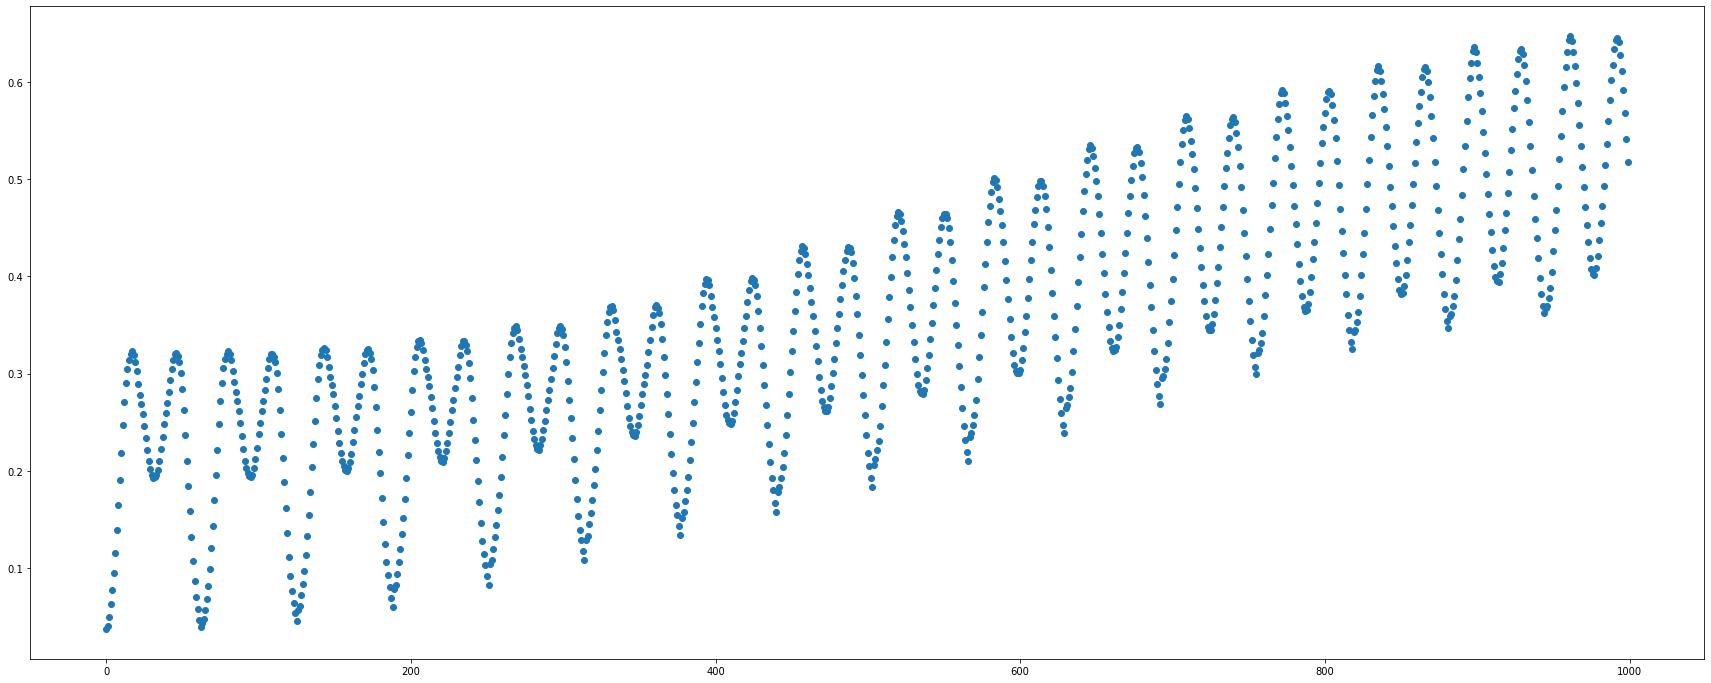

In [ ]:
fig = plt.figure(figsize=(30,12))
plt.scatter(range(1000),X,label='pred')
plt.show()

In [ ]:
for i in range(len(distanciasModo2)):
  for j in range(len(distanciasModo2)):
    if (i != j):
      if (distanciasModo2[i]==distanciasModo2[j]):
        print("Hay dos datos iguales: " , distanciasModo2[i])
        break

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import *
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
#Separacion de datos de entrenamiento y test mediante la funcion split, con 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
X_train.shape

(800, 1)

In [ ]:
sc_train = scaler.fit(X_train)
sc_test = scaler.fit(X_test)

In [ ]:
train_data_scaled = sc_train.transform(X_train)
test_data_scaled = sc_test.transform(X_test)

In [ ]:
test_data_scaled

array([[0.454099  ],
       [0.20038034],
       [0.9074597 ],
       [0.08730009],
       [0.94373715],
       [1.        ],
       [0.42207026],
       [0.85612077],
       [0.6206311 ],
       [0.7619651 ],
       [0.5023171 ],
       [0.4117952 ],
       [0.52673435],
       [0.6380603 ],
       [0.65273607],
       [0.60139966],
       [0.51893157],
       [0.59831923],
       [0.94651663],
       [0.35075188],
       [0.04947317],
       [0.3386655 ],
       [0.79007244],
       [0.66472304],
       [0.18978103],
       [0.5653997 ],
       [0.6660045 ],
       [0.5374153 ],
       [0.26649237],
       [0.82566375],
       [0.6414578 ],
       [0.7141202 ],
       [0.6216006 ],
       [0.31964386],
       [0.38747084],
       [0.97510445],
       [0.364896  ],
       [0.48143327],
       [0.6440302 ],
       [0.38209862],
       [0.39804685],
       [0.39413977],
       [0.35360163],
       [0.48813516],
       [0.19201086],
       [0.37684357],
       [0.47939557],
       [0.340

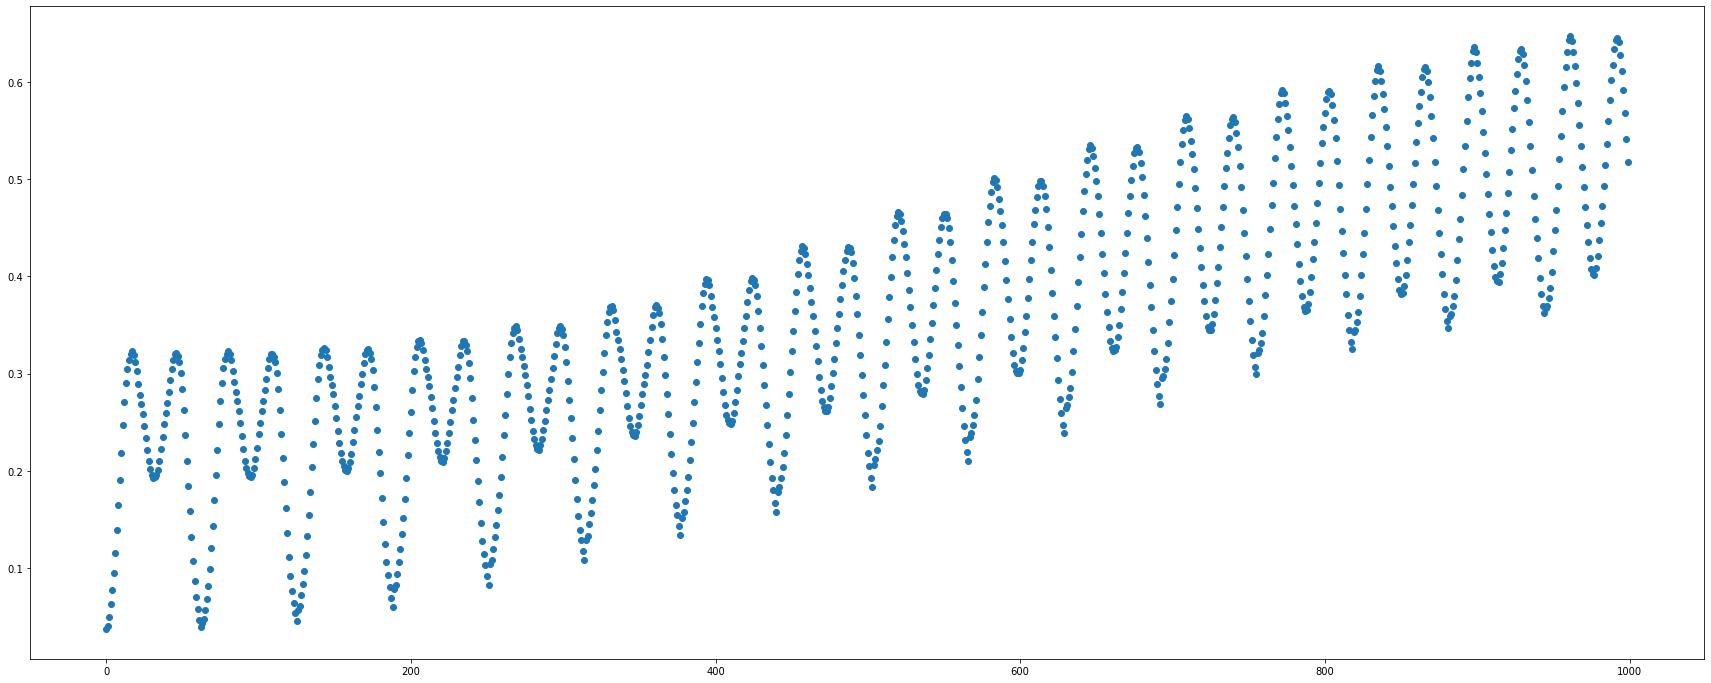

In [ ]:
fig = plt.figure(figsize=(30,12))
plt.scatter(range(1000),distanciasModo2,label='pred')
plt.show()

In [ ]:
X_train = X_train.astype('float32')/np.max(X_train)
X_test = X_test.astype('float32')/ np.max(X_test)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model =  tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.Dense(3)])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
 dense_12 (Dense)            (None, 1024)              2048      
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 3)                

In [ ]:
opt = tf.optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=opt, loss='mse')
hist= model.fit(train_data_scaled, y_train, epochs=300, batch_size=18, validation_data=(test_data_scaled, y_test))

Epoch 1/300
45/45 [==============================] - 1s 10ms/step - loss: 2.6505 - val_loss: 1.2032
Epoch 2/300
45/45 [==============================] - 0s 7ms/step - loss: 1.2011 - val_loss: 1.1096
Epoch 3/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1834 - val_loss: 1.1083
Epoch 4/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1701 - val_loss: 1.1065
Epoch 5/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1646 - val_loss: 1.1099
Epoch 6/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1825 - val_loss: 1.1114
Epoch 7/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1676 - val_loss: 1.1026
Epoch 8/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1581 - val_loss: 1.1272
Epoch 9/300
45/45 [==============================] - 0s 7ms/step - loss: 1.1804 - val_loss: 1.1003
Epoch 10/300
45/45 [==============================] - 0s 8ms/step - loss: 1.1681 - val_loss: 1.1095
Epoch 11

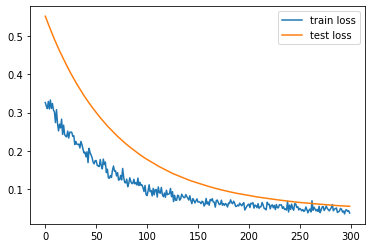

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train loss');
plt.plot(hist.history['val_loss'], label='test loss');
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions.shape
#print(X_test[0][..., np.newaxis].T)
#print(X_test[:1])

(4, 3)

In [ ]:
y_test.shape

(4, 3)

(4, 3)


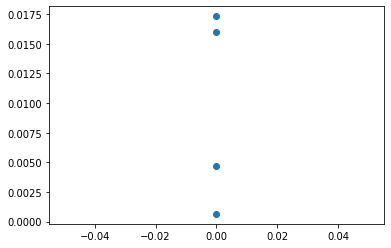

In [ ]:
#rotaciones en X predichas vs reales
print(predictions.shape)
plt.scatter(y_test[0:20,0],predictions[0:20,0],label='pred')
plt.show()

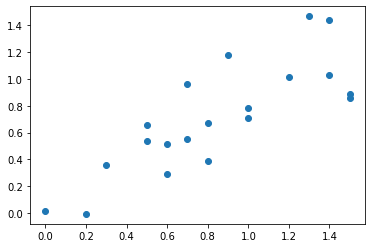

In [ ]:
#rotaciones en Y predichas vs reales
plt.scatter(y_test[0:20,1],predictions[0:20,1],label='pred')
plt.show()

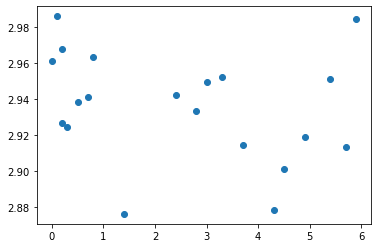

In [ ]:
#rotaciones en Z predichas vs reales
plt.scatter(y_test[0:20,2],predictions[0:20,2],label='pred')
plt.show()

In [ ]:
angulosRotados[95:100]

array([[0. , 0.1, 3.2],
       [0. , 0.1, 3.3],
       [0. , 0.1, 3.4],
       [0. , 0.1, 3.5],
       [0. , 0.1, 3.6]])

In [ ]:
model.predict([0.20565266907215118])

array([[0.00470395, 0.17220034, 2.9754496 ]], dtype=float32)